In [1]:
# import usual libraries for machine learing and data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Read CSV

In [2]:
import os

file_list = os.listdir("Dataset")
file_list = [file.replace(".csv", "") for file in file_list]

# put file names in file_list that have world splitTrain to file_list_train
file_list_train = [file for file in file_list if "splitTrain" in file]
file_list_test = [file for file in file_list if "splitTest" in file]

data_train = {}
for file in file_list_train:
    data_train[file.replace("splitTrain_", "").replace("splitTrain", "")] = pd.read_csv("Dataset/" + file + ".csv")

data_test = {}
for file in file_list_test:
    data_test[file.replace("splitTest_", "").replace("splitTest", "")] = pd.read_csv("Dataset/" + file + ".csv")


# KNN sklearn

In [15]:
# import f1 score metric from sklearn
from sklearn.metrics import f1_score

# function to get dictionary of f1 score prediction for each data train and data test using KNeighborsClassifier
def get_score(data_train, data_test, model, k):
    performanceData = {}
    for key in data_train:
        try:
            X_train = data_train[key].drop(["HeartDisease"], axis=1)
            y_train = data_train[key]["HeartDisease"]
            X_test = data_test[key].drop(["HeartDisease"], axis=1)
            y_test = data_test[key]["HeartDisease"]

            knn = model(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
        except:
            continue
        
        try:
          performanceData[key] = {'f1_score' : f1_score(y_test, y_pred)}
          performanceData[key]['accuracy'] = accuracy_score(y_test, y_pred)
          performanceData[key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
          performanceData[key]['roc_auc_score'] = roc_auc_score(y_test, y_pred)
          performanceData[key]['precision_score'] = precision_score(y_test, y_pred)
          performanceData[key]['recall_score'] = recall_score(y_test, y_pred)
        except:
          continue
            
    return performanceData

In [20]:
list_f1_score_knnsklearn = get_score(data_train, data_test, KNeighborsClassifier, k=5)
df_list_f1_score_knnsklearn = pd.DataFrame.from_dict(list_f1_score_knnsklearn, orient='index')
df_list_f1_score_knnsklearn.sort_values(by=["f1_score", "accuracy", "roc_auc_score", "precision_score", "recall_score"], ascending=False)
df_list_f1_score_knnsklearn

,f1_score,accuracy,confusion_matrix,roc_auc_score,precision_score,recall_score
df_encoded_minmaxScaled,0.845455,0.815217,"[[57, 20], [14, 93]]",0.804709,0.823009,0.869159
df_modifiedOutlier_encoded_minmaxScaled,0.808511,0.816327,"[[63, 12], [15, 57]]",0.815833,0.826087,0.791667
df_deleteOutlier_encoded_minmaxScaled,0.827068,0.836879,"[[63, 11], [12, 55]]",0.836123,0.833333,0.820896
df_DF_encoded_minmaxScaled,0.827907,0.798913,"[[58, 19], [18, 89]]",0.792511,0.824074,0.831776
df_DF_modifiedOutlier_encoded_minmaxScaled,0.816327,0.816327,"[[60, 15], [12, 60]]",0.816667,0.800000,0.833333
df_DF_deleteOutlier_encoded_minmaxScaled,0.838235,0.843972,"[[62, 12], [10, 57]]",0.844292,0.826087,0.850746
df_encoded_,0.734884,0.690217,"[[48, 29], [28, 79]]",0.680847,0.731481,0.738318
df_DF_encoded_,0.734884,0.690217,"[[48, 29], [28, 79]]",0.680847,0.731481,0.738318
df_modifiedOutlier_encoded_,0.657718,0.653061,"[[47, 28], [23, 49]]",0.653611,0.636364,0.680556
df_DF_modifiedOutlier_encoded_,0.657718,0.653061,"[[47, 28], [23, 49]]",0.653611,0.636364,0.680556


# KNN from scratch

In [24]:
from collections import Counter

def minkowski_distance(x, y, p):
    # return the minkowski distance between two points
    return np.linalg.norm(x - y, ord=p)

# create class that represent k-nearest-neighbors
class KNN:
    def __init__(self, n_neighbors=5, p = 3):
        self.k = n_neighbors
        self.p = p
        self.distance_function = minkowski_distance
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            # find the nearest neighbors of the point x
            distances = np.array([self.distance_function(X.iloc[i, :], self.X_train.iloc[j, :], p=self.p) for j in range(len(self.X_train))])
            k_minimum_distances_indices = np.argsort(distances)[:self.k]
            k_minimum_distances_labels = self.y_train.iloc[k_minimum_distances_indices].to_numpy()
            counter = Counter(k_minimum_distances_labels)
            y_pred[i] = counter.most_common(1)[0][0]
        return y_pred

In [ ]:
list_f1_score_knnscratch = get_score(data_train, data_test, KNN, k=5)
df_list_f1_score_knnscratch = pd.DataFrame.from_dict(list_f1_score_knnscratch, orient='index')

In [26]:
df_list_f1_score_knnscratch.sort_values(by=["f1_score", "accuracy", "roc_auc_score", "precision_score", "recall_score"], ascending=False)
df_list_f1_score_knnscratch

,f1_score,accuracy,confusion_matrix,roc_auc_score,precision_score,recall_score
df_modifiedOutlier_encoded_minmaxScaled,0.780142,0.789116,"[[61, 14], [17, 55]]",0.788611,0.797101,0.763889
df_deleteOutlier_encoded_minmaxScaled,0.835821,0.843972,"[[63, 11], [11, 56]]",0.843586,0.835821,0.835821
df_DF_encoded_minmaxScaled,0.811321,0.782609,"[[58, 19], [21, 86]]",0.778493,0.819048,0.803738
df_DF_modifiedOutlier_encoded_minmaxScaled,0.805369,0.802721,"[[58, 17], [12, 60]]",0.803333,0.779221,0.833333
df_DF_deleteOutlier_encoded_minmaxScaled,0.823529,0.829787,"[[61, 13], [11, 56]]",0.830073,0.811594,0.835821
df_encoded_,0.713615,0.668478,"[[47, 30], [31, 76]]",0.660335,0.716981,0.710280
df_DF_encoded_,0.713615,0.668478,"[[47, 30], [31, 76]]",0.660335,0.716981,0.710280
df_modifiedOutlier_encoded_,0.635762,0.625850,"[[44, 31], [24, 48]]",0.626667,0.607595,0.666667
df_DF_modifiedOutlier_encoded_,0.635762,0.625850,"[[44, 31], [24, 48]]",0.626667,0.607595,0.666667
df_deleteOutlier_encoded_,0.680272,0.666667,"[[44, 30], [17, 50]]",0.670432,0.625000,0.746269


# Eksperimen

In [27]:
X_train = data_train["df_encoded_minmaxScaled"].drop(["HeartDisease"], axis=1)
y_train = data_train["df_encoded_minmaxScaled"]["HeartDisease"]
X_test = data_test["df_encoded_minmaxScaled"].drop(["HeartDisease"], axis=1)
y_test = data_test["df_encoded_minmaxScaled"]["HeartDisease"]

/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

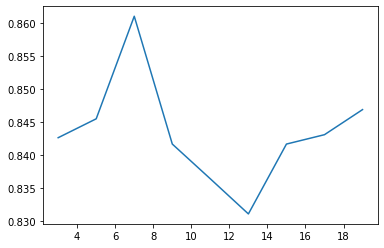

In [29]:
# efek nilai K dengan akurasi
k_range = list(range(3, 20, 2))

scores = []
for k in k_range:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

# plot the scores using sns
sns.lineplot(k_range, scores)

/home/tridi/anaconda3/envs/lrn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

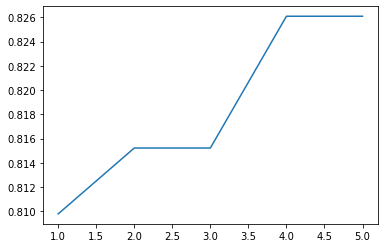

In [31]:
p_list = [1, 2, 3, 4, 5]

scores = []
for p in p_list:
    knn = KNN(n_neighbors=5, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# plot the scores using sns
sns.lineplot(p_list, scores)